In [46]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
import datetime
from sklearn.linear_model import LinearRegression

In [47]:
baseflow = pd.read_csv('RRCA_baseflow.csv')

In [48]:
result = []
for date in baseflow['Date']:
        excel_date = int(date)
        py_date = datetime.datetime(1, 1, 1) + datetime.timedelta(excel_date - 2)

        result.append(py_date)

baseflow['formatDate'] = result

display(baseflow)

,Date,Segment_id,x,y,Evapotranspiration,Precipitation,Irrigation_pumping,Observed,formatDate
0,710732,144,1086190,14476800,0.59,18.99,0.0,0.145161,1946-12-01
1,710763,144,1086190,14476800,0.97,29.63,0.0,0.445161,1947-01-01
2,710791,144,1086190,14476800,1.34,29.63,0.0,1.332203,1947-01-29
3,710822,144,1086190,14476800,1.79,29.63,0.0,2.932203,1947-03-01
4,710852,144,1086190,14476800,8.23,29.63,0.0,3.728689,1947-03-31
...,...,...,...,...,...,...,...,...,...
15586,721810,98,721870,14387040,0.00,0.00,0.0,0.298500,1977-03-31
15587,721841,98,721870,14387040,0.00,0.00,0.0,0.211475,1977-05-01
15588,721871,98,721870,14387040,0.00,0.00,0.0,0.122951,1977-05-31
15589,721902,98,721870,14387040,0.00,0.00,0.0,0.120000,1977-07-01


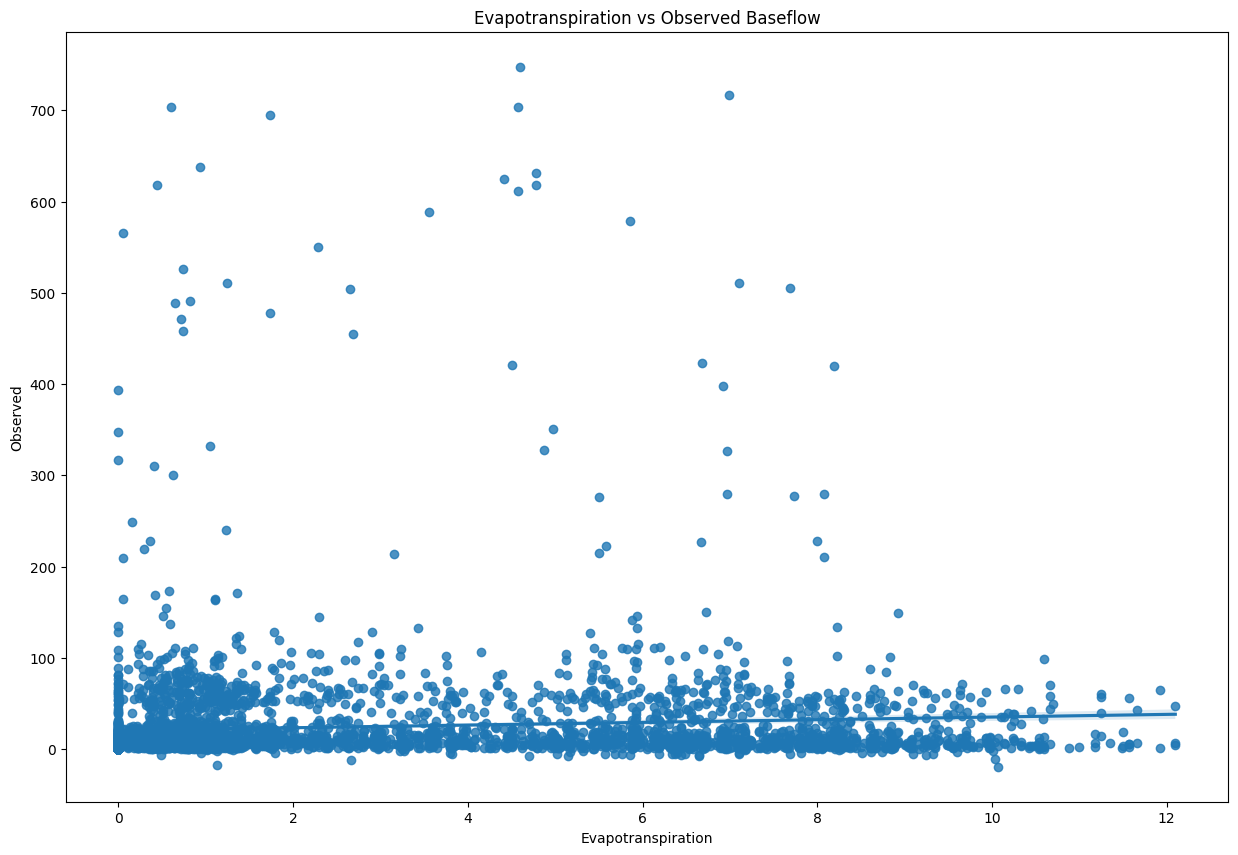

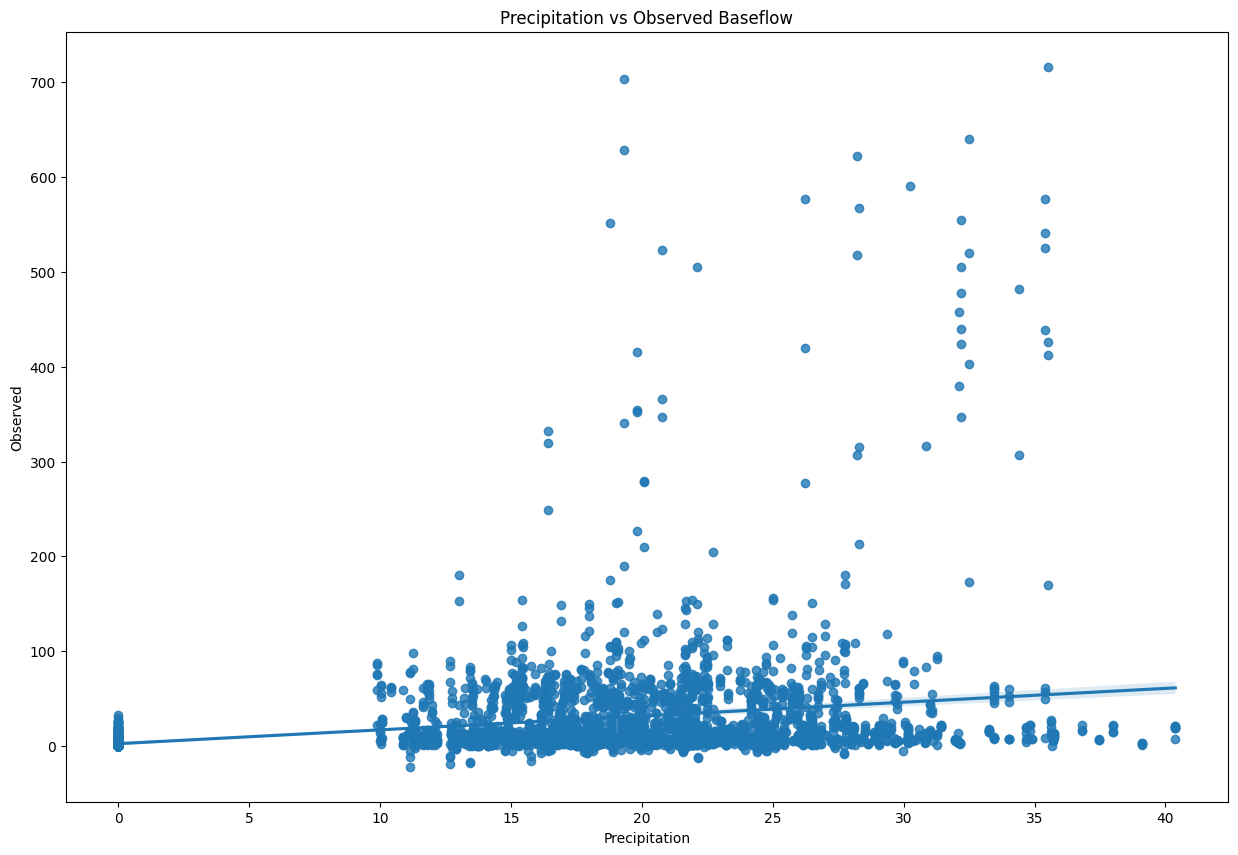

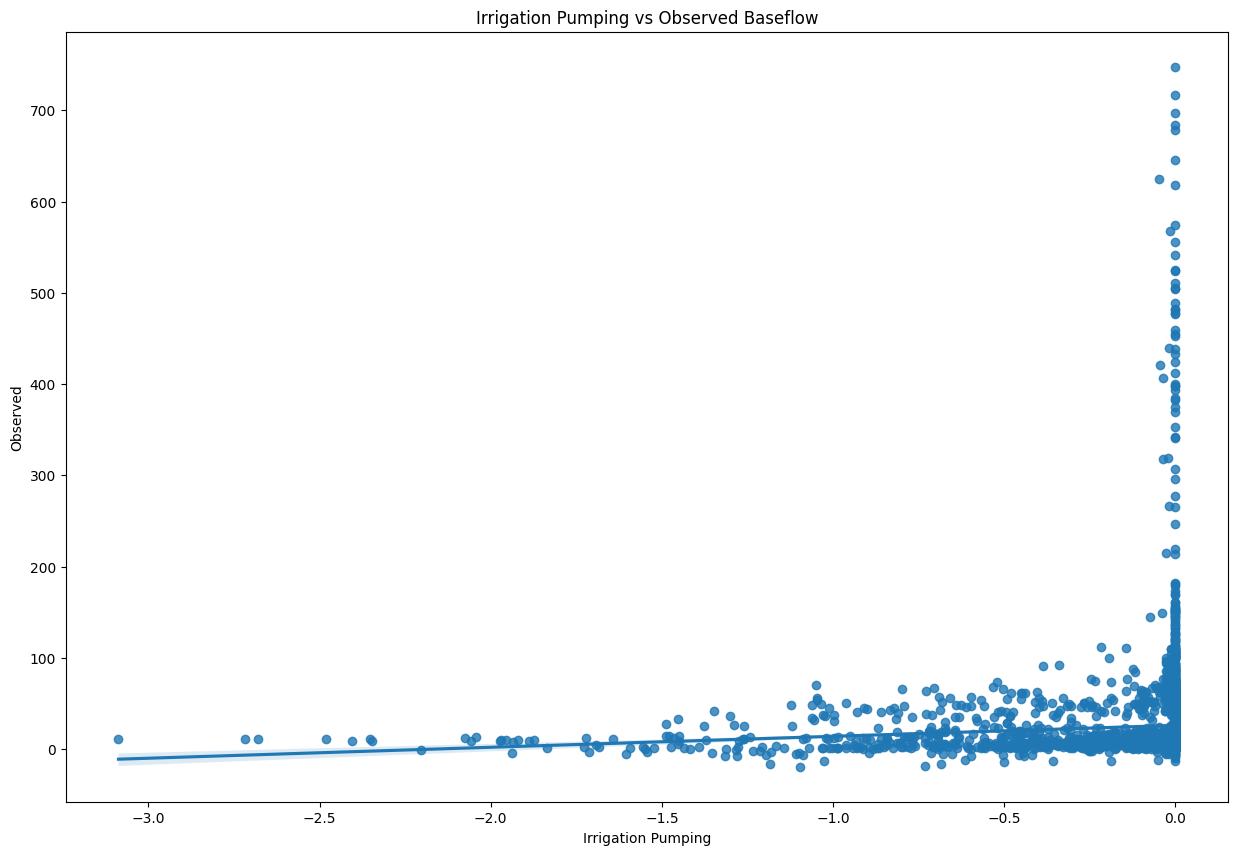

In [49]:
plt.figure(figsize=(15,10))
evapotranspirationGraph = sns.regplot(data=baseflow.sample(frac=.25), x='Evapotranspiration', y='Observed')
evapotranspirationGraph.set(title="Evapotranspiration vs Observed Baseflow")
plt.savefig('./Figs/Evap_vs_ObservedBaseflow.pdf')
plt.figure(figsize=(15,10))
precipitationGraph = sns.regplot(data=baseflow.sample(frac=.25), x='Precipitation', y='Observed')
precipitationGraph.set(title="Precipitation vs Observed Baseflow")
plt.savefig('./Figs/Precip_vs_ObservedBaseflow.pdf')
plt.figure(figsize=(15,10))
irrPumpingGraph = sns.regplot(data=baseflow.sample(frac=.25), x='Irrigation_pumping', y='Observed')
irrPumpingGraph.set(xlabel="Irrigation Pumping", title="Irrigation Pumping vs Observed Baseflow")
plt.savefig('./Figs/IrrPump_vs_ObservedBaseflow.pdf')

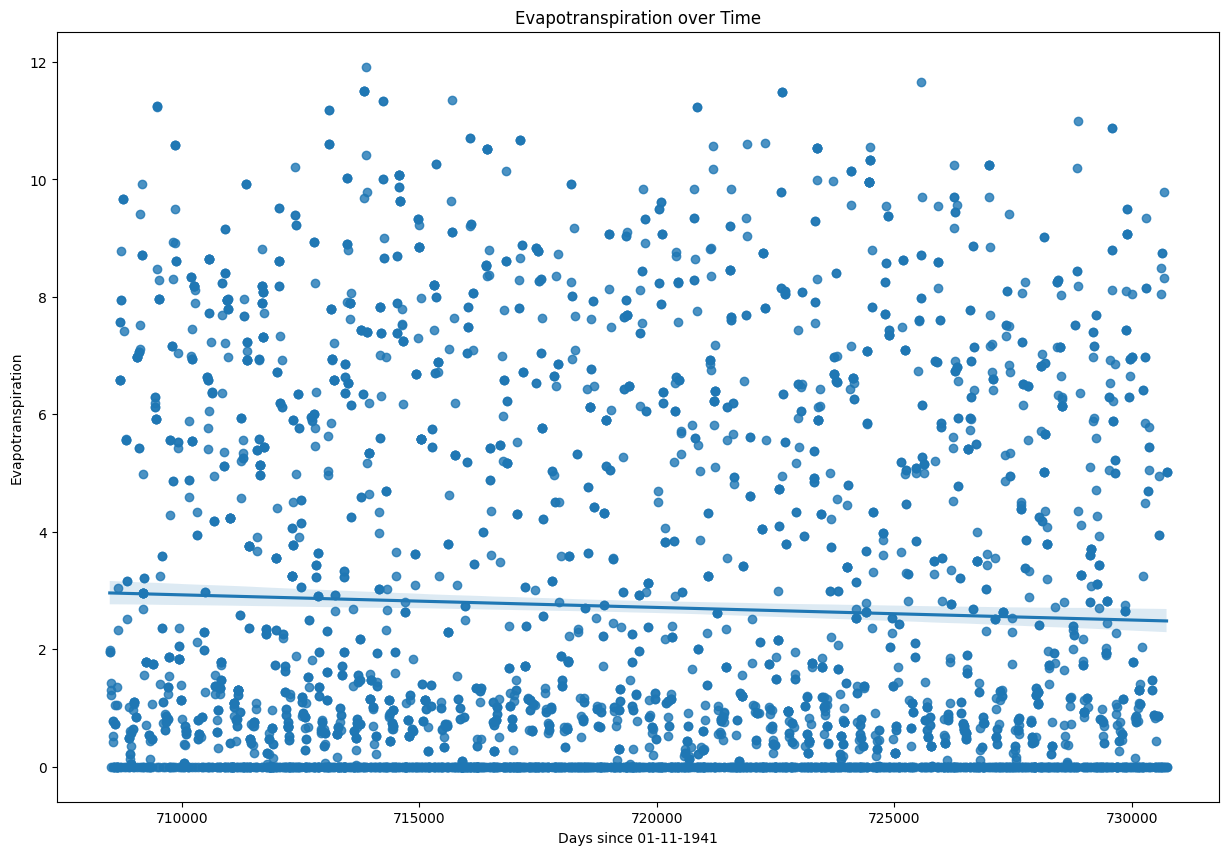

In [50]:
plt.figure(figsize=(15, 10))
evapotransipirationTimeGraph = sns.regplot(x='Date', y='Evapotranspiration', data=baseflow.sample(frac=.25))
evapotransipirationTimeGraph.set(title="Evapotranspiration over Time", xlabel="Days since 01-11-1941")
plt.savefig('./Figs/Evap_over_time.pdf')

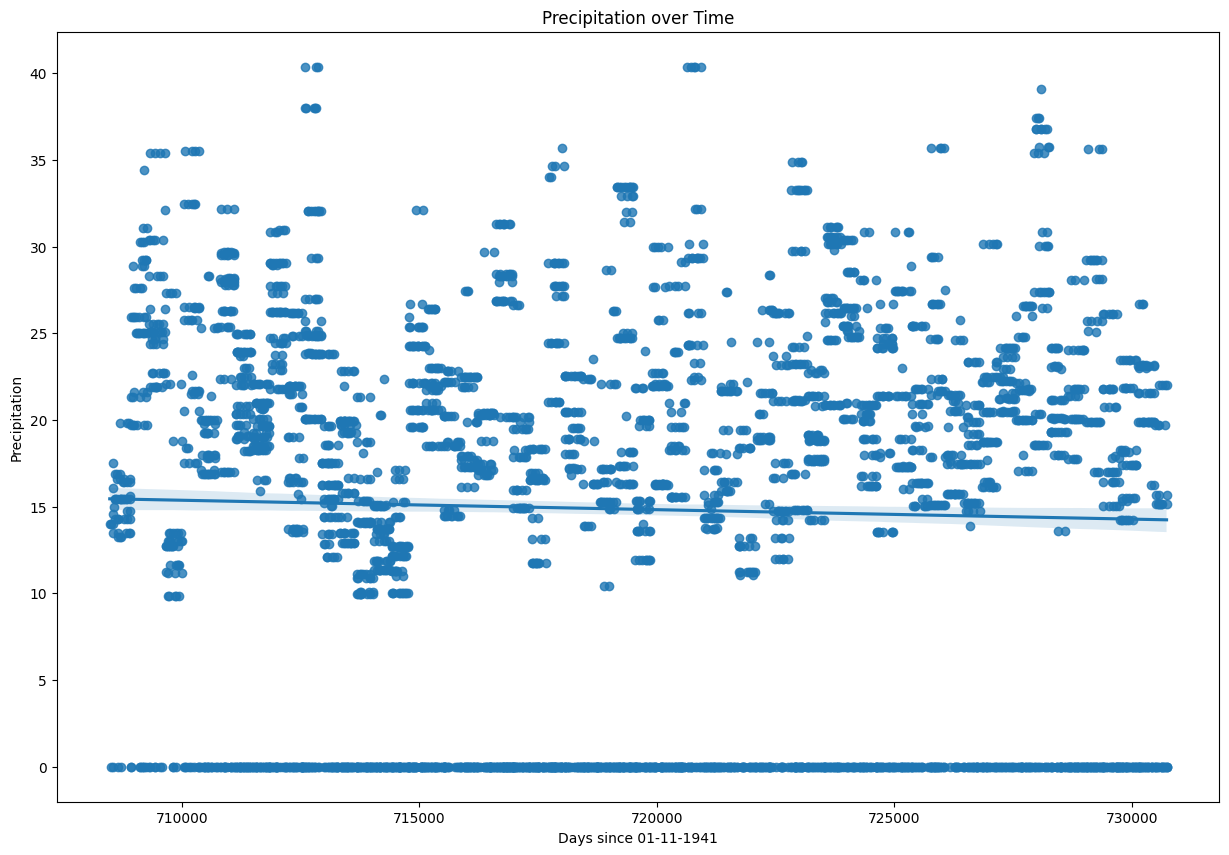

In [51]:
plt.figure(figsize=(15, 10))
precipitationTimeGraph = sns.regplot(x='Date', y='Precipitation', data=baseflow.sample(frac=.25))
precipitationTimeGraph.set(title="Precipitation over Time", xlabel="Days since 01-11-1941")
plt.savefig('./Figs/Precip_over_time.pdf')

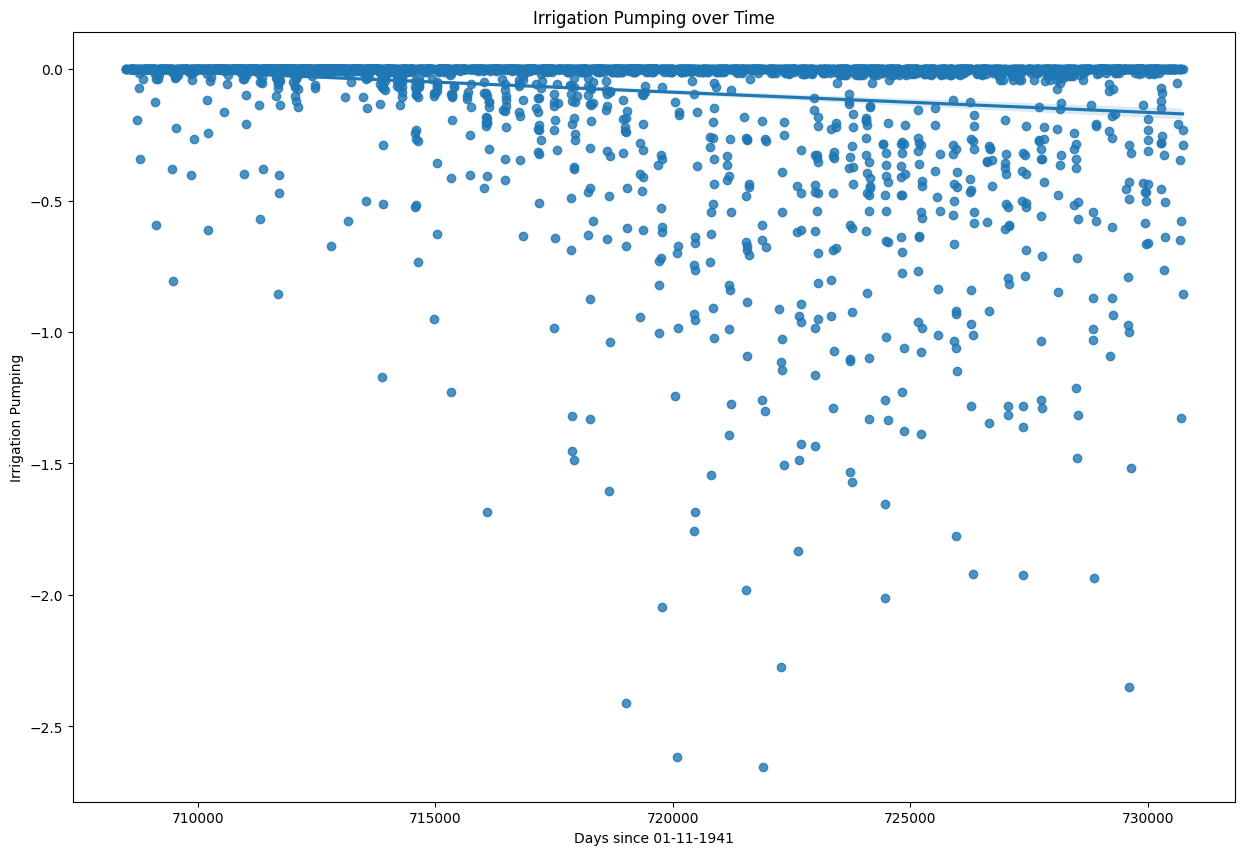

In [52]:
plt.figure(figsize=(15, 10))
irrPumpingTimeGraph = sns.regplot(x='Date', y='Irrigation_pumping', data=baseflow.sample(frac=.25))
irrPumpingTimeGraph.set(title="Irrigation Pumping over Time", xlabel="Days since 01-11-1941", ylabel="Irrigation Pumping")
plt.savefig('./Figs/IrrPump_over_time.pdf')

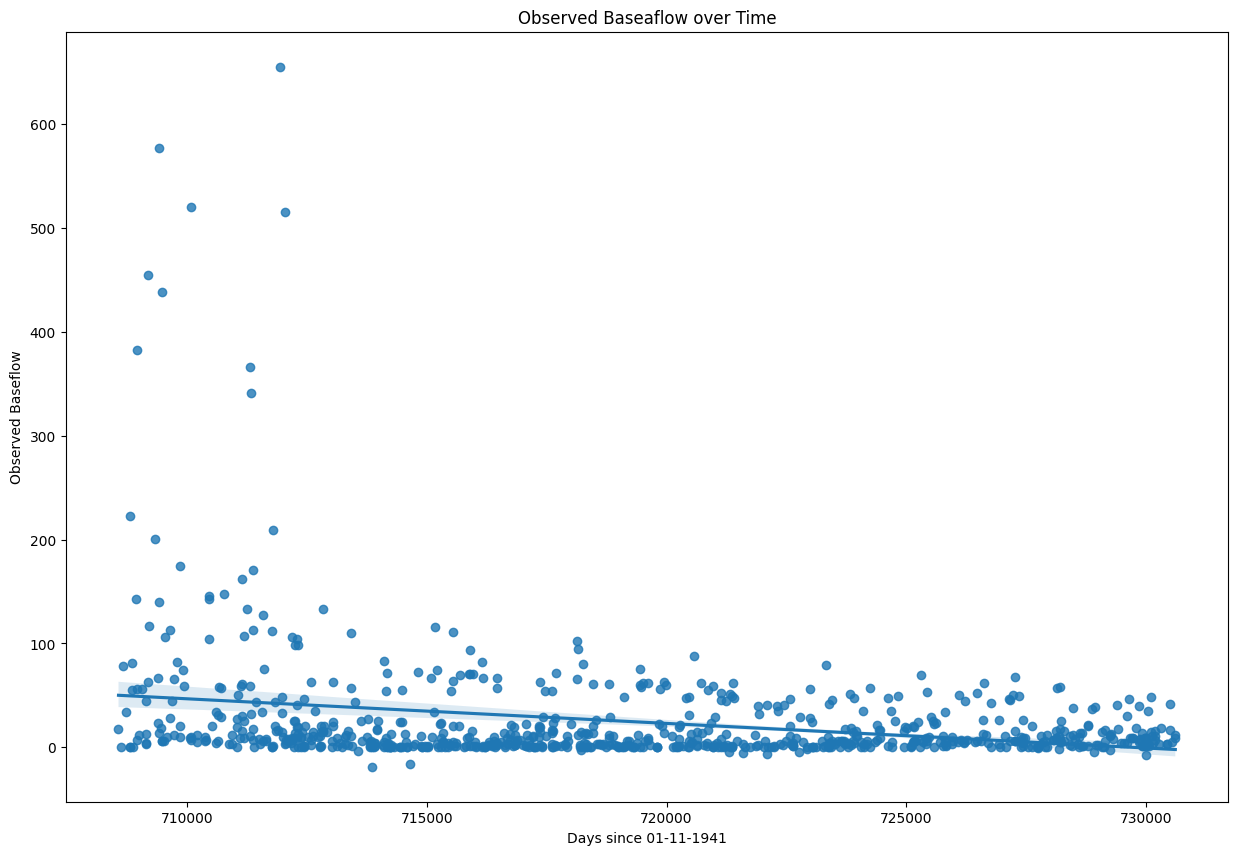

In [53]:
plt.figure(figsize=(15, 10))
observedTimeGraph = sns.regplot(x='Date', y='Observed', data=baseflow.sample(frac=.05))
observedTimeGraph.set(title="Observed Baseaflow over Time", xlabel="Days since 01-11-1941", ylabel="Observed Baseflow")
plt.savefig('./Figs/Baseflow_over_time.pdf')

In [54]:
X = baseflow[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping']]
y = baseflow.Observed

lm = LinearRegression()
lm.fit(X, y)

display(lm.intercept_)
display(list(zip(['Evapotranspiration', 'Precipitation', 'Irrigation_pumping'], lm.coef_)))

3.239848518780015

[('Evapotranspiration', -0.31281848314946575),
 ('Precipitation', 1.5612704659728462),
 ('Irrigation_pumping', 18.734762721771784)]

In [55]:
import statsmodels.formula.api as smf

lm = smf.ols(formula='Observed ~ Evapotranspiration', data=baseflow).fit()
lm.pvalues

Intercept             3.106939e-267
Evapotranspiration     7.285232e-15
dtype: float64

In [56]:
lm = smf.ols(formula='Observed ~ Precipitation', data=baseflow).fit()
lm.pvalues

Intercept         1.277606e-03
Precipitation    1.191739e-258
dtype: float64

In [57]:
lm = smf.ols(formula='Observed ~ Irrigation_pumping', data=baseflow).fit()
lm.pvalues

Intercept             0.000000e+00
Irrigation_pumping    7.824229e-12
dtype: float64

In [58]:
X = baseflow[['Evapotranspiration', 'Precipitation']]
y = baseflow.Observed

lm = LinearRegression()
lm.fit(X, y)

display(lm.intercept_)
display(list(zip(['Evapotranspiration', 'Precipitation'], lm.coef_)))

3.3133328572279304

[('Evapotranspiration', -1.1634743740235507),
 ('Precipitation', 1.5956755004745864)]

In [59]:
locationAVG = baseflow.groupby(['Segment_id'])[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']].mean()
locationMED = baseflow.groupby(['Segment_id'])[['Evapotranspiration', 'Precipitation', 'Irrigation_pumping', 'Observed']].median()

display(locationAVG)
display(locationMED)

,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Segment_id,,,,
40,3.132130,26.650463,-0.118707,13.718162
51,0.000000,0.000000,0.000000,0.120455
53,3.718333,20.379500,-0.059035,61.816953
55,3.788817,20.887178,-0.182822,1.449889
56,0.000000,0.000000,0.000000,3.372105
59,3.720250,18.210667,-0.374238,11.917548
60,3.665375,21.386563,-0.064829,17.199675
62,3.298636,22.850909,-0.005419,10.984851
63,3.351471,21.216176,-0.012621,4.432331


,Evapotranspiration,Precipitation,Irrigation_pumping,Observed
Segment_id,,,,
40,2.345,26.200,0.000000,14.093951
51,0.000,0.000,0.000000,0.000000
53,2.965,20.500,0.000000,26.453188
55,2.690,21.240,-0.004286,1.269469
56,0.000,0.000,0.000000,3.941017
59,2.755,17.845,0.000000,12.076803
60,2.785,21.320,0.000000,17.506101
62,2.630,21.970,0.000000,11.240984
63,2.320,19.650,0.000000,4.533814


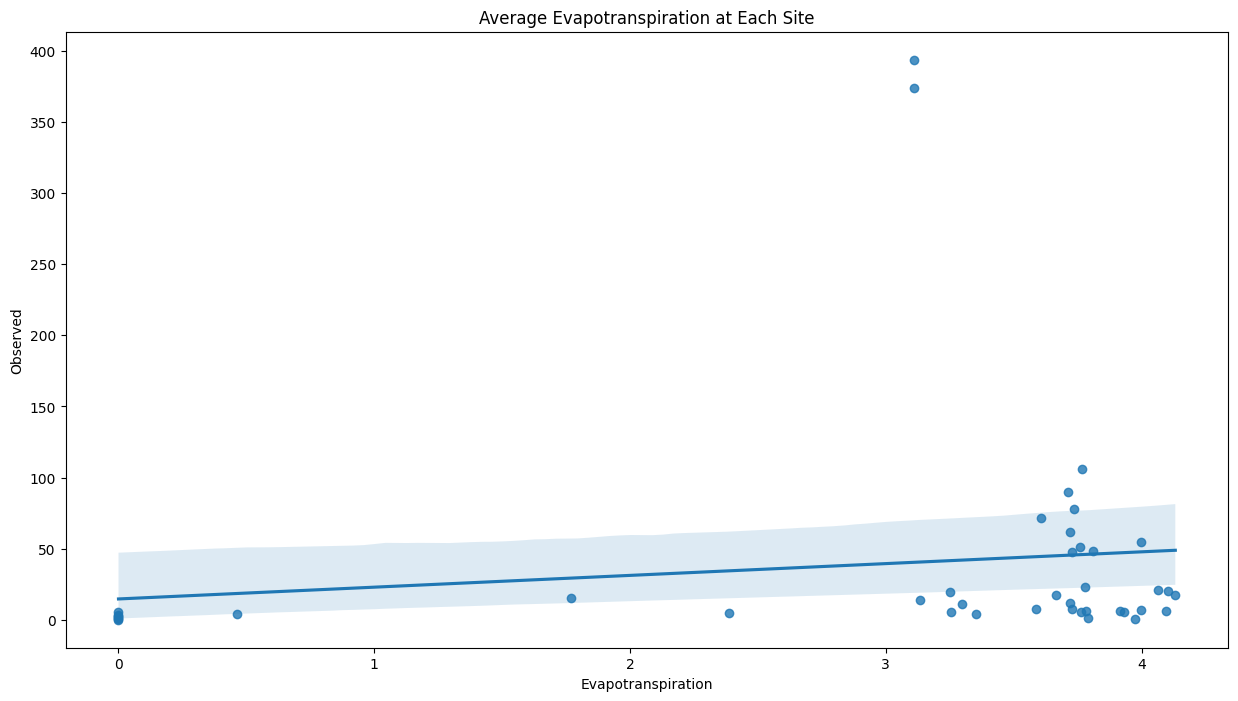

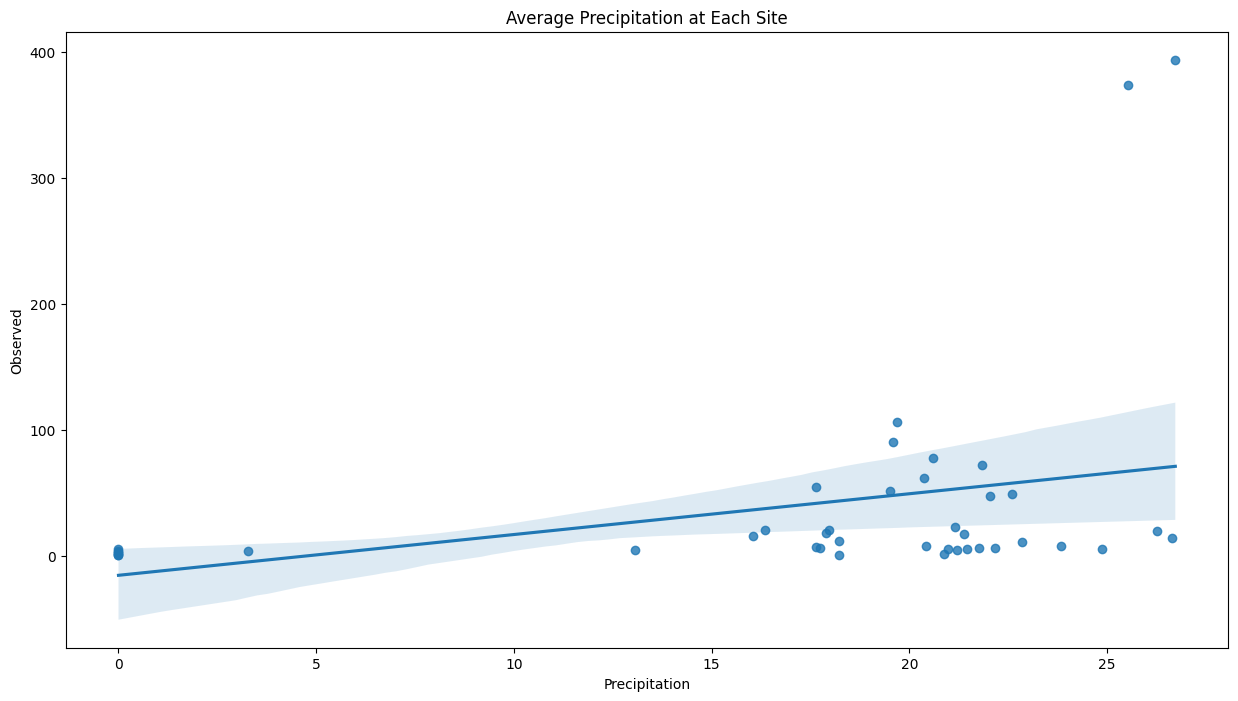

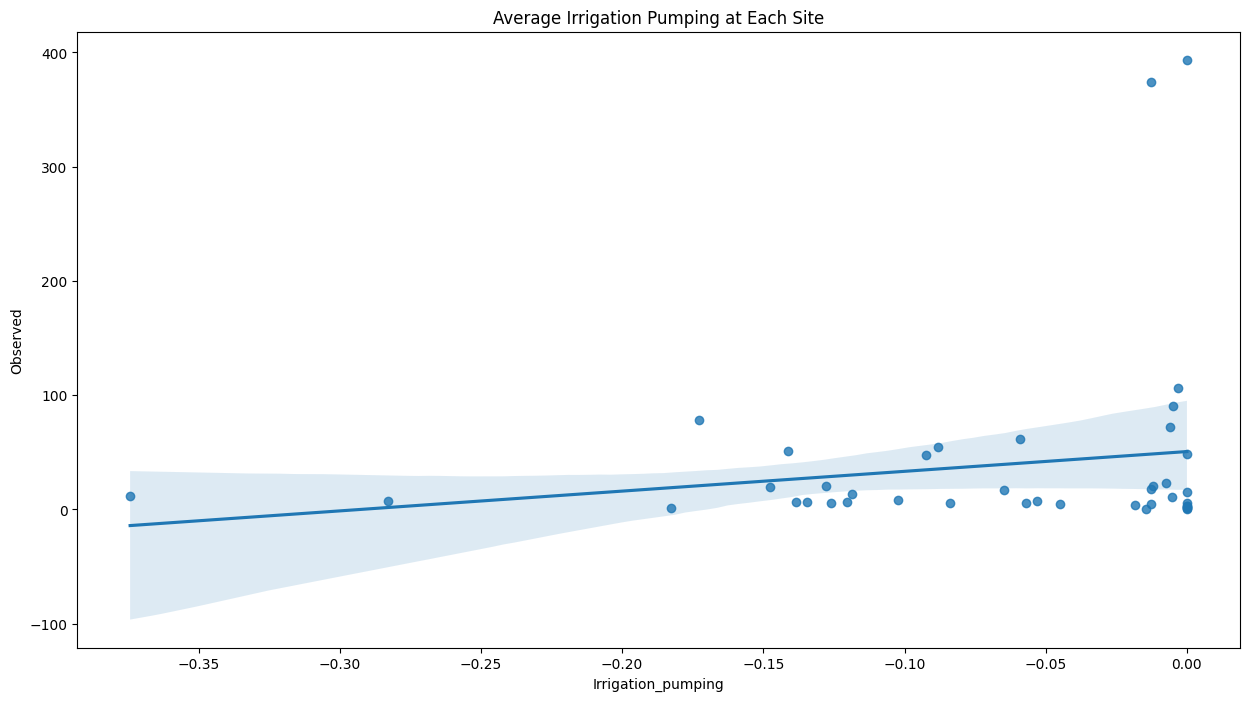

In [60]:
plt.figure(figsize=(15, 8))
locAVGEvapotranspirationGraph = sns.regplot(x='Evapotranspiration', y='Observed', data=locationAVG)
locAVGEvapotranspirationGraph.set(title="Average Evapotranspiration at Each Site")
plt.savefig('./Figs/Location_AVG_Evap.pdf')
plt.figure(figsize=(15, 8))
locAVGPrecipitationGraph = sns.regplot(x='Precipitation', y='Observed', data=locationAVG)
locAVGPrecipitationGraph.set(title="Average Precipitation at Each Site")
plt.savefig('./Figs/Location_AVG_Precip.pdf')
plt.figure(figsize=(15, 8))
locAVGIrrPumpingGraph = sns.regplot(x='Irrigation_pumping', y='Observed', data=locationAVG)
locAVGIrrPumpingGraph.set(title="Average Irrigation Pumping at Each Site")
plt.savefig('./Figs/Location_AVG_IrrPump.pdf')

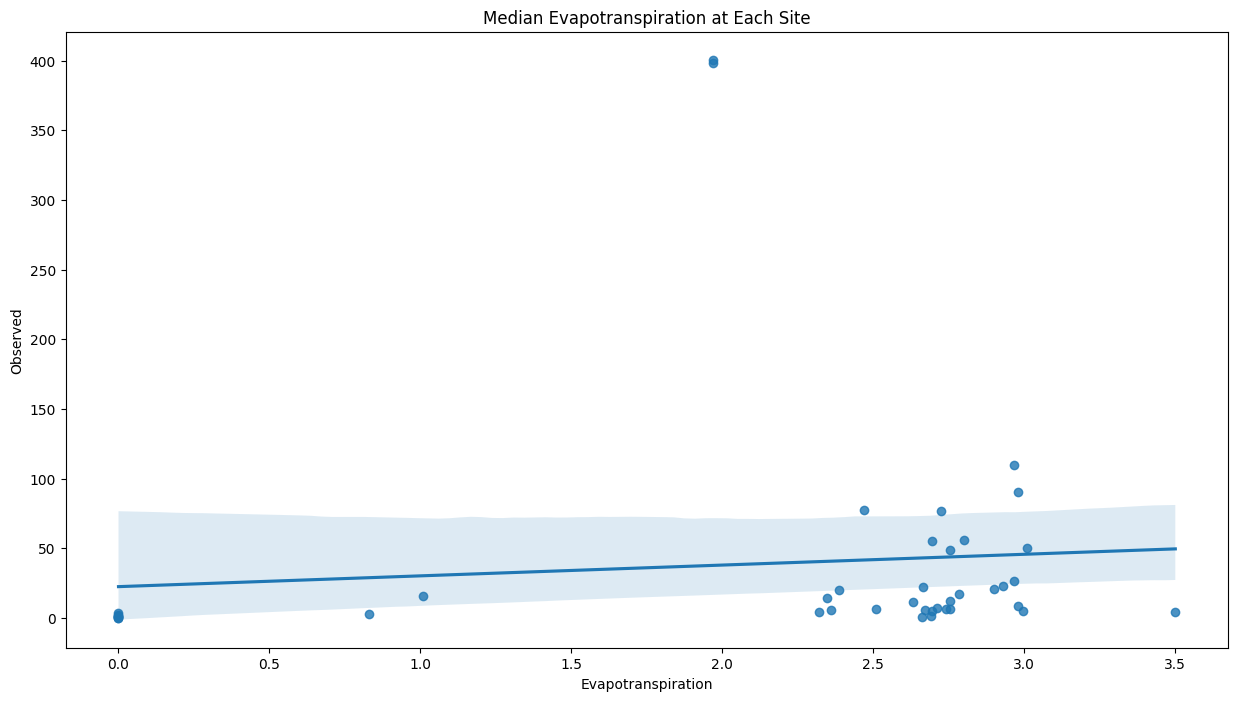

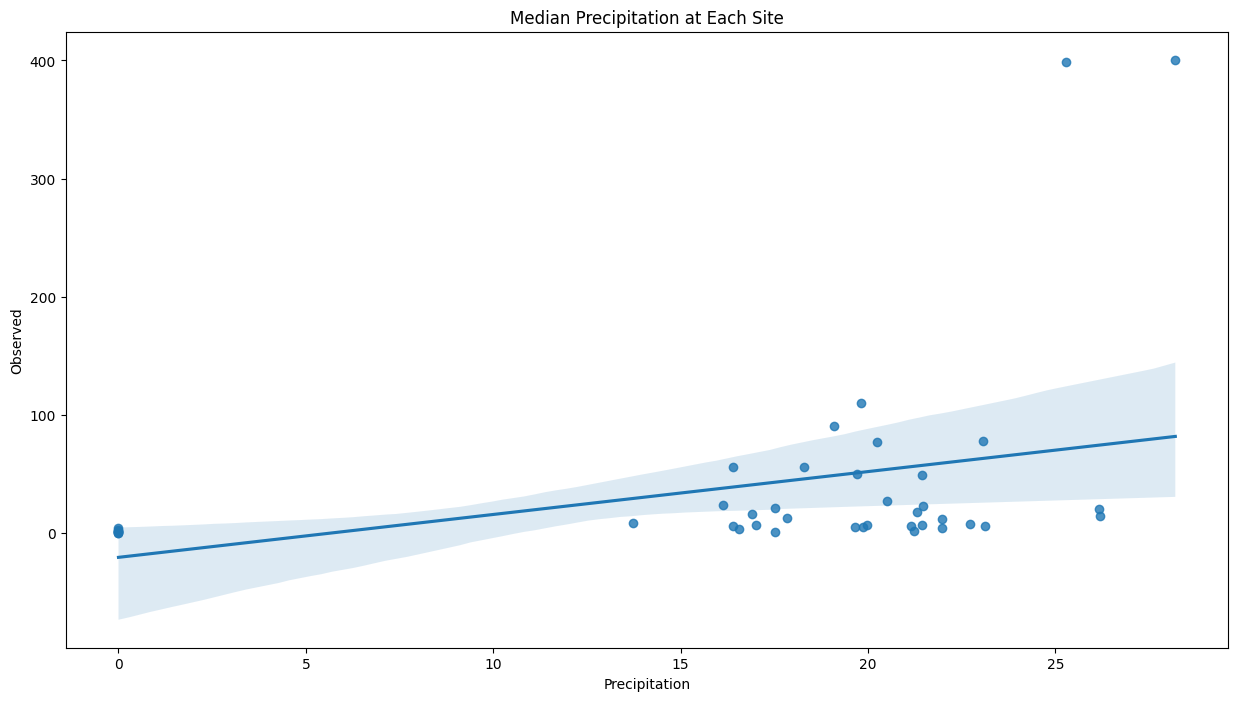

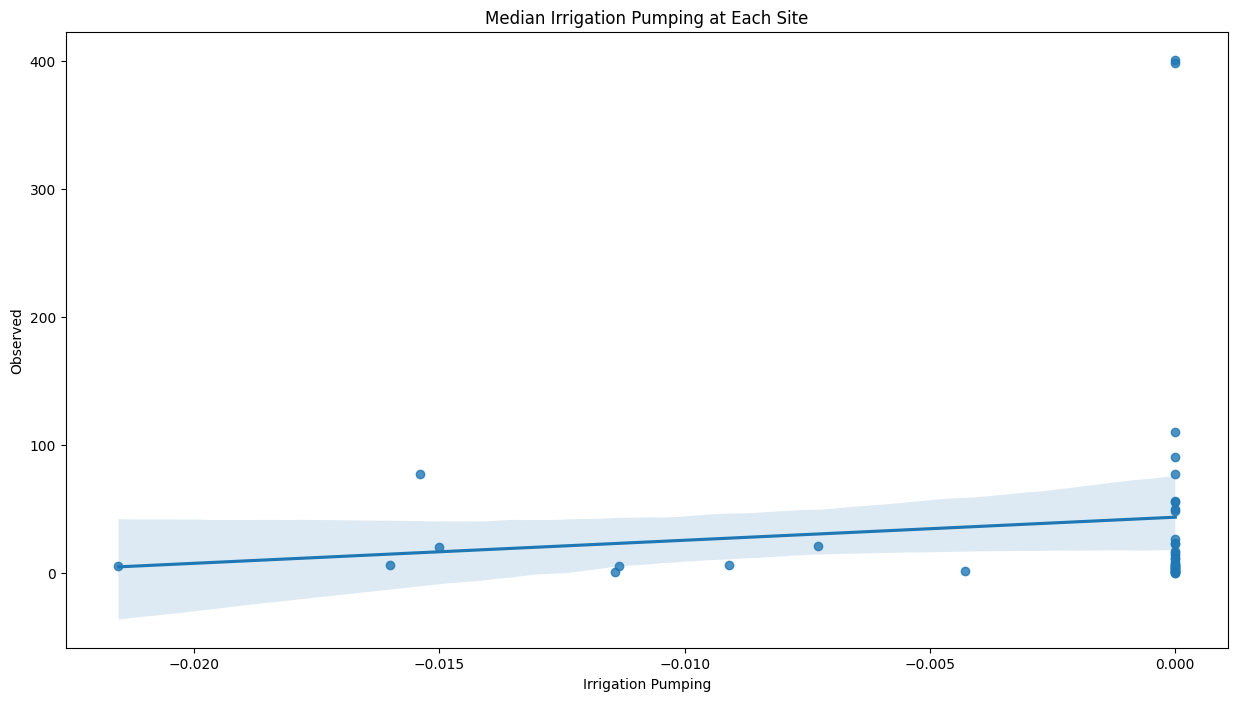

In [61]:
plt.figure(figsize=(15, 8))
locMEDEvapotranspirationGraph = sns.regplot(x='Evapotranspiration', y='Observed', data=locationMED)
locMEDEvapotranspirationGraph.set(title="Median Evapotranspiration at Each Site")
plt.savefig('./Figs/Location_MED_Evap.pdf')
plt.figure(figsize=(15, 8))
locMEDPrecipitationGraph = sns.regplot(x='Precipitation', y='Observed', data=locationMED)
locMEDPrecipitationGraph.set(title="Median Precipitation at Each Site")
plt.savefig('./Figs/Location_MED_Precip.pdf')
plt.figure(figsize=(15, 8))
locMEDIrrPumpingGraph = sns.regplot(x='Irrigation_pumping', y='Observed', data=locationMED)
locMEDIrrPumpingGraph.set(title="Median Irrigation Pumping at Each Site", xlabel="Irrigation Pumping")
plt.savefig('./Figs/Location_MED_IrrPump.pdf')